<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

<center>본 실습에서 요구하는 내용 외에도 다양한 내용을 스스로 추가하여  탐색하고 분석해 보기를 권고합니다.</center>

# 전국 아파트 평균 매매가격

<img src='https://raw.githubusercontent.com/Jangrae/img/master/apart.png' width="650" align="left">

## 1.환경 설정

- 데이터 탐색과 전처리를 하기 전 라이브러리와 파일을 읽어옵니다.
- 시각화에 한글이 포함된 경우 이에 대한 설정을 진행합니다.

**1) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [1]:
# 라이브러리 불러오기
import matplotlib 
import matplotlib.pyplot as plt

# 폰트설정
matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

**2) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 apart 데이터프레임을 만드세요.
- 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/apart_price.csv
- 단축 경로: 'https://bit.ly/ApartFile'
- Decoding 오류가 발생하면 encoding='CP949' 옵션을 지정해 읽어옵니다.

In [131]:
# 데이터 읽어오기
path = 'https://bit.ly/ApartFile'
apart = pd.read_csv(path, encoding='CP949')

## 2.데이터 탐색

다음과 같은 정보 확인을 통해 처리할 대상 데이터를 이해합니다.
- 상/하위 데이터 확인
- 데이터프레임 크기 확인
- 열 이름, 데이터 형식, 값 개수 등 확인
- 기초 통계정보 확인
- 결측치 확인
- 범주형 데이터 확인
- 개별 열 값 상세 확인 등

**1) 상/하위 데이터 확인**

- 상/하위 데이터를 확인합니다.

In [7]:
# 상위 5개 행 확인
apart.head()

,지역1,지역2,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
0,서울,종로구,1029542,1033625,1036486,1036681,1037986,1039903,1041444,1044347,1045819,1047819,1048722,1050750
1,서울,중구,802257,806143,807771,808743,809900,812157,814614,820100,822257,823314,824371,829486
2,서울,용산구,1399354,1406439,1411232,1412659,1413768,1416951,1421012,1427366,1430780,1434768,1439390,1445073
3,서울,성동구,910716,916402,918667,920020,921108,923402,927029,934049,938029,940000,942235,947157
4,서울,광진구,1021037,1025866,1029256,1030878,1032220,1034524,1038378,1047439,1053024,1056524,1059476,1063805


In [8]:
# 하위 5개 행 확인
apart.tail()

,지역1,지역2,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
182,경남,밀양시,126455,126261,125989,125727,125773,125625,125977,126977,127614,127932,128364,129125
183,경남,거제시,155274,155921,156366,156543,156165,155616,156555,157811,159494,160220,160549,161079
184,경남,양산시,172574,172582,172828,173383,174672,181445,187973,191410,194660,197867,201191,204215
185,제주,제주시,303871,303757,303757,303800,303771,304414,306314,308871,310943,313814,324614,344400
186,제주,서귀포시,223087,222696,222196,221685,221457,221500,222043,222913,223370,224065,224913,231457


**2) 열 데이터 형식, 값 개수 확인**

- 어떤 열이 있고, 맻 개의 값들을 갖는지, 데이터 형식은 어떠한 지 확인합니다.

In [9]:
# 열 정보 확인
apart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역1      187 non-null    object
 1   지역2      187 non-null    object
 2   2020-08  187 non-null    int64 
 3   2020-09  187 non-null    int64 
 4   2020-10  187 non-null    int64 
 5   2020-11  187 non-null    int64 
 6   2020-12  187 non-null    int64 
 7   2021-01  187 non-null    int64 
 8   2021-02  187 non-null    int64 
 9   2021-03  187 non-null    int64 
 10  2021-04  187 non-null    int64 
 11  2021-05  187 non-null    int64 
 12  2021-06  187 non-null    int64 
 13  2021-07  187 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 20.6+ KB


**3) 결측치 확인**

- 결측치가 있는 지 확인합니다.

In [10]:
# 결측치 확인
print(apart.isnull().sum())

지역1        0
지역2        0
2020-08    0
2020-09    0
2020-10    0
2020-11    0
2020-12    0
2021-01    0
2021-02    0
2021-03    0
2021-04    0
2021-05    0
2021-06    0
2021-07    0
dtype: int64


**4) 데이터프레임 크기 확인**
- 데이터프레임 크기를 확인합니다. 행과 열의 개수를 파악합니다.

In [12]:
print(apart.shape)

(187, 14)


**5) 기초 통계정보 확인**
- 각 열의 데이터 개수, 평균, 표준편차, 최솟값, 1~3 분위수, 최댓값의 정보를 파악합니다.

In [73]:
apart.describe()

,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,증가액,증가율
count,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,187.000000,187.000000
mean,3.429660e+05,3.456397e+05,3.478531e+05,3.492826e+05,3.518816e+05,3.563870e+05,3.603933e+05,3.653163e+05,3.688655e+05,3.723293e+05,3.757256e+05,3.816681e+05,38702.064171,11.634708
std,2.835917e+05,2.855867e+05,2.868470e+05,2.873621e+05,2.880428e+05,2.892677e+05,2.912634e+05,2.942345e+05,2.956551e+05,2.972473e+05,2.991623e+05,3.030026e+05,32514.894696,7.299609
min,7.837500e+04,7.837500e+04,7.818800e+04,7.820800e+04,7.825000e+04,7.814600e+04,7.812500e+04,7.818800e+04,7.831300e+04,7.812500e+04,7.820800e+04,7.833300e+04,-5264.000000,-3.192857
25%,1.618390e+05,1.626765e+05,1.633895e+05,1.635535e+05,1.632735e+05,1.637785e+05,1.641690e+05,1.663785e+05,1.683925e+05,1.702530e+05,1.719605e+05,1.744370e+05,14643.500000,5.434298
50%,2.469320e+05,2.493830e+05,2.500550e+05,2.523670e+05,2.529710e+05,2.557350e+05,2.577230e+05,2.612110e+05,2.661170e+05,2.703280e+05,2.763280e+05,2.807330e+05,29261.000000,11.557457
75%,4.236115e+05,4.269300e+05,4.318980e+05,4.385925e+05,4.446290e+05,4.549485e+05,4.633750e+05,4.712285e+05,4.768195e+05,4.827720e+05,4.873345e+05,4.946470e+05,54982.000000,16.633131
max,1.751014e+06,1.757795e+06,1.759164e+06,1.759747e+06,1.761322e+06,1.771322e+06,1.783411e+06,1.797521e+06,1.807781e+06,1.818192e+06,1.834199e+06,1.873390e+06,144265.000000,30.789194


**6) 고유값 확인**

In [132]:
apart['지역2'].value_counts()

동구     6
남구     6
중구     6
북구     5
서구     5
      ..
청주시    1
영통구    1
상주시    1
안성시    1
파주시    1
Name: 지역2, Length: 163, dtype: int64

## 3.데이터 전처리
전처리 과정에서 다음과 같은 처리를 할 수 있습니다.

- 결측치 처리
- 값 변경
- 열 추가
- 불필요한 열 제거
- 열 이름 변경
- 데이터 통합(연결 또는 조인)
- 가변수화 등

**1) 열 이름 변경**

- 지역1, 지역2 열 이름을 각각 '시도', '구군'으로 변경합니다.

In [22]:
# 열 이름 변경
apart.rename(columns={'지역1':'시도', '지역2':'구군'}, inplace=True)

# 확인
apart.head()

,시도,구군,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
0,서울,종로구,1029542,1033625,1036486,1036681,1037986,1039903,1041444,1044347,1045819,1047819,1048722,1050750
1,서울,중구,802257,806143,807771,808743,809900,812157,814614,820100,822257,823314,824371,829486
2,서울,용산구,1399354,1406439,1411232,1412659,1413768,1416951,1421012,1427366,1430780,1434768,1439390,1445073
3,서울,성동구,910716,916402,918667,920020,921108,923402,927029,934049,938029,940000,942235,947157
4,서울,광진구,1021037,1025866,1029256,1030878,1032220,1034524,1038378,1047439,1053024,1056524,1059476,1063805


**2) 열 추가**

- 다음 공식을 사용해 '증가액', '증가율' 열을 추가합니다.

    - 증가액: 2021년 7월 가격 - 2020년 8월 가격
    - 증가율: (2021년 7월 가격 - 2020년 8월 가격) * 100 / 2020년 8월 가격

In [23]:
# 연간 증가액
apart['증가액'] = apart['2021-07'] - apart['2020-08']

# 연간 증가율
apart['증가율'] = ( apart['2021-07']-apart['2020-08'] )*100/apart['2020-08']

# 확인
apart.head()

,시도,구군,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,증가액,증가율
0,서울,종로구,1029542,1033625,1036486,1036681,1037986,1039903,1041444,1044347,1045819,1047819,1048722,1050750,21208,2.059945
1,서울,중구,802257,806143,807771,808743,809900,812157,814614,820100,822257,823314,824371,829486,27229,3.394050
2,서울,용산구,1399354,1406439,1411232,1412659,1413768,1416951,1421012,1427366,1430780,1434768,1439390,1445073,45719,3.267150
3,서울,성동구,910716,916402,918667,920020,921108,923402,927029,934049,938029,940000,942235,947157,36441,4.001357
4,서울,광진구,1021037,1025866,1029256,1030878,1032220,1034524,1038378,1047439,1053024,1056524,1059476,1063805,42768,4.188683


**3) 불필요한 열 제거**

- 시도, 구군, 증가액, 증가율 열만 추출하여 apart2 데이터프레임을 선언합니다.
- 이후 모든 작업은 apart2 데이터프레임을 대상으로 합니다.

In [24]:
apart.columns

Index(['시도', '구군', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '증가액', '증가율'],
      dtype='object')

In [26]:
# 분석 대상 열 지정
del_col = ['2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06']

apart2=apart.drop(columns=del_col, axis=1)

# 확인
apart2.head()

,시도,구군,2021-07,증가액,증가율
0,서울,종로구,1050750,21208,2.059945
1,서울,중구,829486,27229,3.394050
2,서울,용산구,1445073,45719,3.267150
3,서울,성동구,947157,36441,4.001357
4,서울,광진구,1063805,42768,4.188683


## 4.데이터 분석

- 데이터를 집계하고 간단히 시각화하여 분석합니다.
- 연속형 값은 선 그래프, 범주형 값은 막대 그래프로 시각화함이 일반적입니다.

### 4.1.전국 분석

**1) 가격 변동 현황**

- 구군의 아파트 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

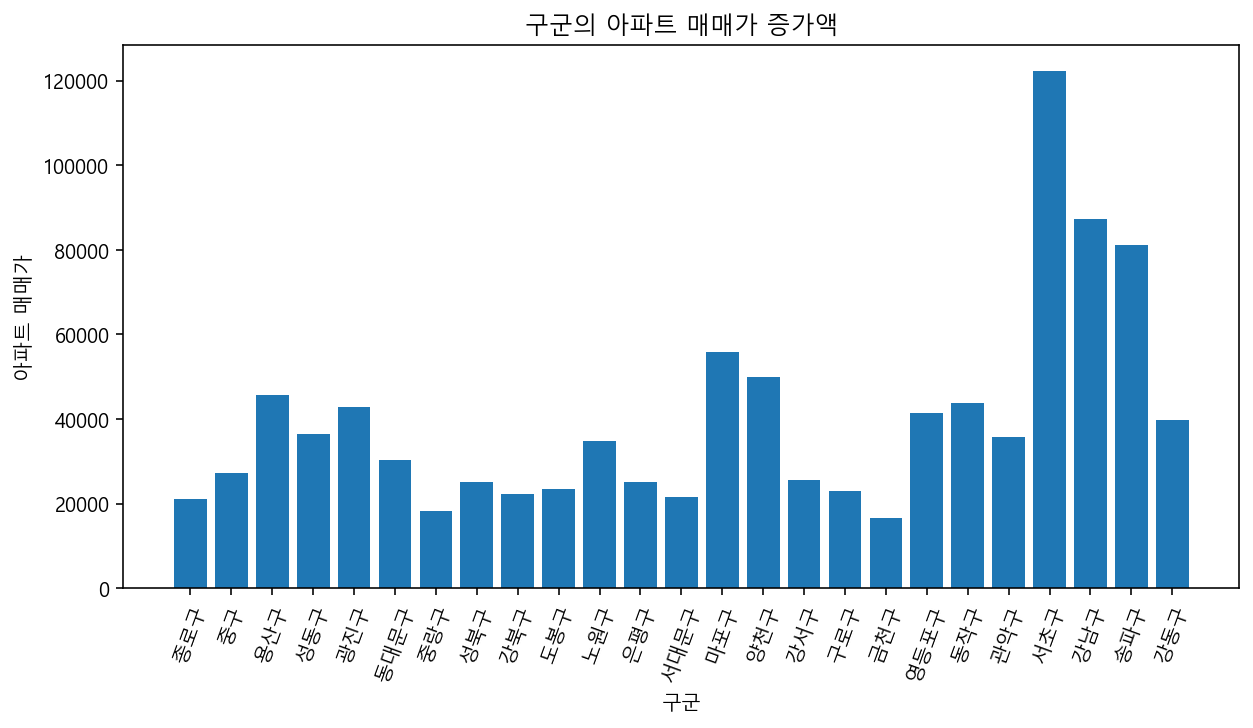

In [39]:
# 차트 그리기(25개 정도)
plt.figure(figsize=(10, 5))
plt.bar(apart2['구군'].head(25), apart2['증가액'].head(25))
plt.xticks(rotation=70)
plt.title('구군의 아파트 매매가 증가액')
plt.ylabel('아파트 매매가')
plt.xlabel('구군')
plt.show()

**2) 가격 변동 TOP 25**

- 증가액 기준으로 상위 25개 행을 추출해 tmp 데이터프레임을 선언합니다.

In [41]:
# 가격 변동 TOP 25
tmp = apart2.sort_values(by='증가액', ascending=False).head(25)

# 확인
tmp

,시도,구군,2021-07,증가액,증가율
28,경기,동안구,720886,144265,25.019033
34,경기,의왕시,637225,141787,28.618515
99,대구,수성구,648196,132345,25.655664
86,부산,해운대구,526641,123977,30.789194
21,서울,서초구,1873390,122376,6.988865
26,경기,안양시,662823,120878,22.304477
25,경기,과천시,1368271,108063,8.575013
73,인천,연수구,565838,107033,23.328647
32,경기,분당구,1030865,104115,11.234421
62,경기,덕양구,487441,101934,26.441543


- tmp 데이터프레임을 대상으로 구군별 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

<function matplotlib.pyplot.show(close=None, block=None)>

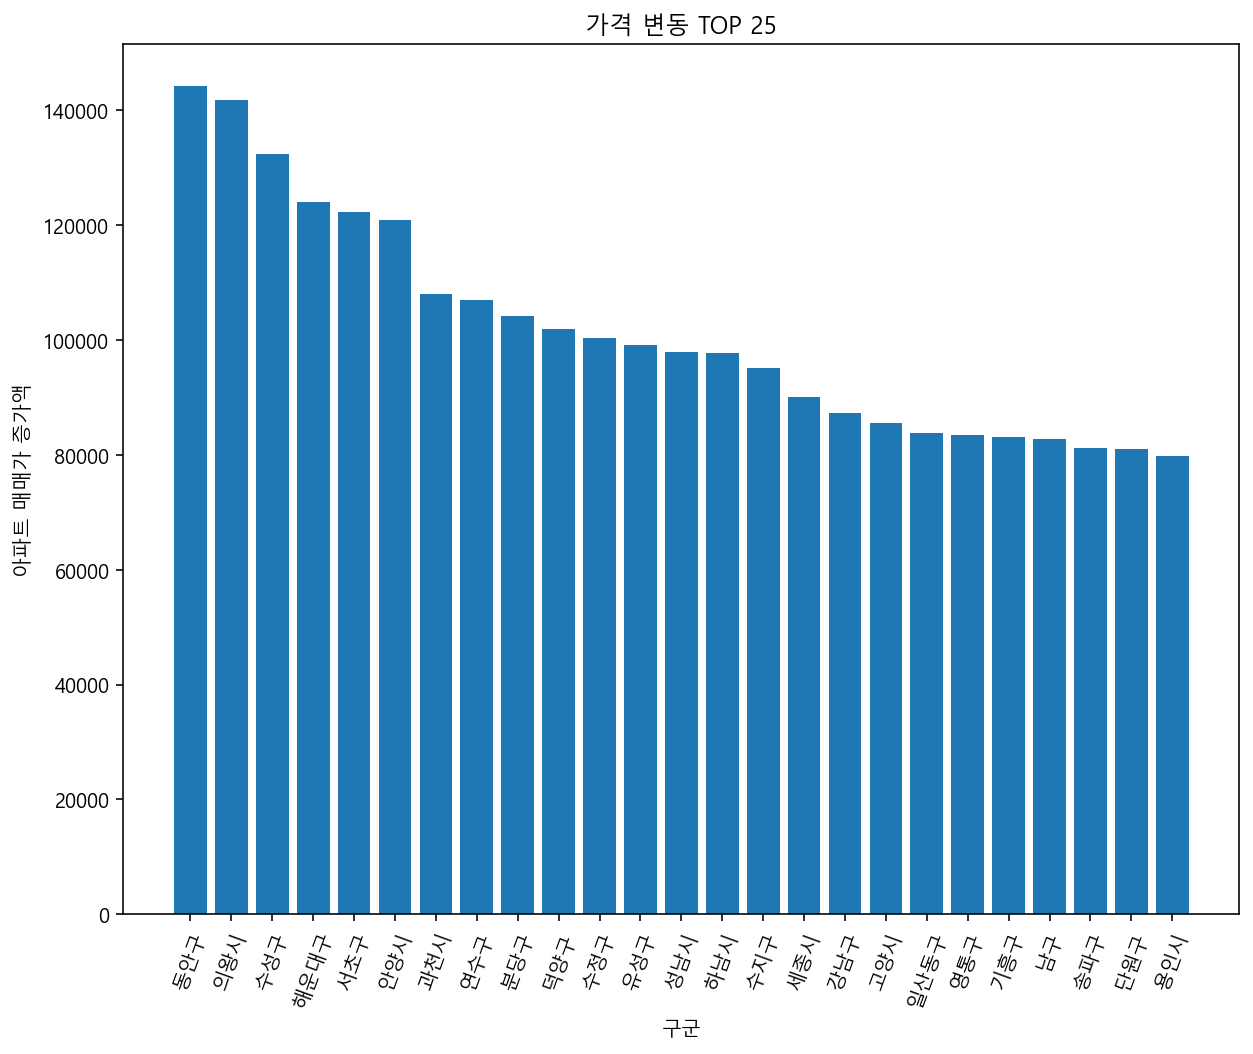

In [49]:
# 차트 그리기
plt.figure(figsize=(10, 8))
plt.bar(tmp['구군'], tmp['증가액'])
plt.xticks(rotation=70)
plt.title('가격 변동 TOP 25')
plt.xlabel('구군')
plt.ylabel('아파트 매매가 증가액')
plt.show

**3) 가격 변동 BOTTOM 25**

- 증가액 기준으로 하위 25개 행을 추출해 tmp 데이터프레임을 선언합니다.

In [88]:
# 가격 변동 BOTTOM 25
tmp = apart2.sort_values(by='증가액', ascending=True).head(25)

# 확인
tmp

,시도,구군,2021-07,증가액,증가율
144,충남,당진시,159604,-5264,-3.192857
180,경남,사천시,123093,-3527,-2.785500
78,부산,중구,144688,-2645,-1.795253
158,전남,무안군,192525,-2588,-1.326411
153,전남,목포시,145139,-2396,-1.624021
156,전남,나주시,165052,-1188,-0.714629
169,경북,문경시,140700,-550,-0.389381
167,경북,영천시,101133,-93,-0.091874
122,강원,태백시,78333,-42,-0.053589
151,전북,남원시,141221,486,0.345330


- tmp 데이터프레임을 대상으로 구군별 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

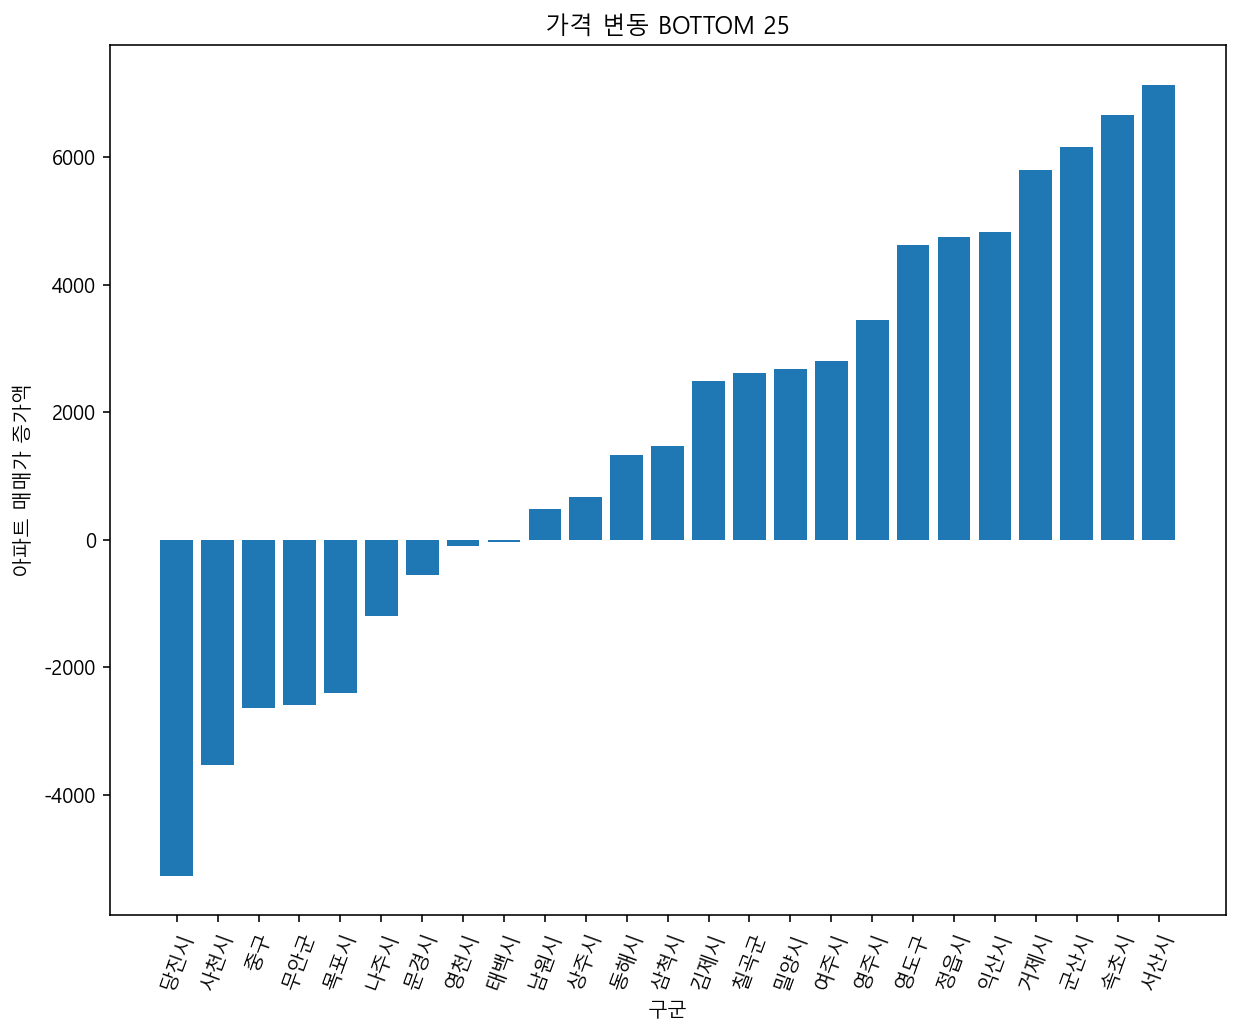

In [89]:
# 차트 그리기

plt.figure(figsize=(10, 8))
plt.bar(tmp['구군'], tmp['증가액'])
plt.xticks(rotation=70)
plt.title('가격 변동 BOTTOM 25')
plt.xlabel('구군')
plt.ylabel('아파트 매매가 증가액')
plt.show()

### 4.2. 부산 지역 분석

**0) 지역 파악**

In [57]:
apart2['시도'].unique()

array(['서울', '경기', '인천', '부산', '대구', '광주', '대전', '울산', '세종', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [58]:
apart2['구군'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', '과천시', '안양시',
       '만안구', '동안구', '성남시', '수정구', '중원구', '분당구', '군포시', '의왕시', '안성시',
       '용인시', '처인구', '기흥구', '수지구', '수원시', '장안구', '권선구', '팔달구', '영통구',
       '부천시', '안산시', '상록구', '단원구', '시흥시', '광명시', '화성시', '오산시', '평택시',
       '남양주시', '구리시', '하남시', '광주시', '이천시', '여주시', '김포시', '고양시', '덕양구',
       '일산동구', '일산서구', '파주시', '포천시', '동두천시', '양주시', '의정부시', '동구', '남구',
       '연수구', '남동구', '부평구', '계양구', '서구', '영도구', '부산진구', '연제구', '수영구',
       '해운대구', '금정구', '동래구', '기장군', '북구', '사상구', '사하구', '수성구', '달서구',
       '달성군', '광산구', '유성구', '대덕구', '울주군', '세종시', '춘천시', '원주시', '강릉시',
       '동해시', '태백시', '속초시', '삼척시', '청주시', '상당구', '서원구', '흥덕구', '청원구',
       '충주시', '제천시', '음성군', '천안시', '동남구', '서북구', '공주시', '보령시', '아산시',
       '서산시', '논산시', '계룡시', '홍성군', '예산군', '당진시', '전주시', '완산구', '덕진구',
       '군산시', '

**1) 부산 지역 데이터 추출**

- apart2 데이터프레임에서 부산 지역 데이터만 추출해 새로운 데이터프레임을 선언합니다.

In [61]:
# 데이터프레임 만들기
busan = apart2.loc[apart2['시도']=='부산',:]

# 확인
busan

,시도,구군,2021-07,증가액,증가율
78,부산,중구,144688,-2645,-1.795253
79,부산,서구,301656,29916,11.009053
80,부산,동구,225986,20139,9.783480
81,부산,영도구,200742,4625,2.358286
82,부산,부산진구,299675,41122,15.904669
83,부산,남구,441427,82844,23.103159
84,부산,연제구,431333,75416,21.189210
85,부산,수영구,510421,79132,18.347790
86,부산,해운대구,526641,123977,30.789194
87,부산,금정구,349512,50475,16.879182


**2) 부산 지역 가격 변동 현황**

- 부산 지역 아파트 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

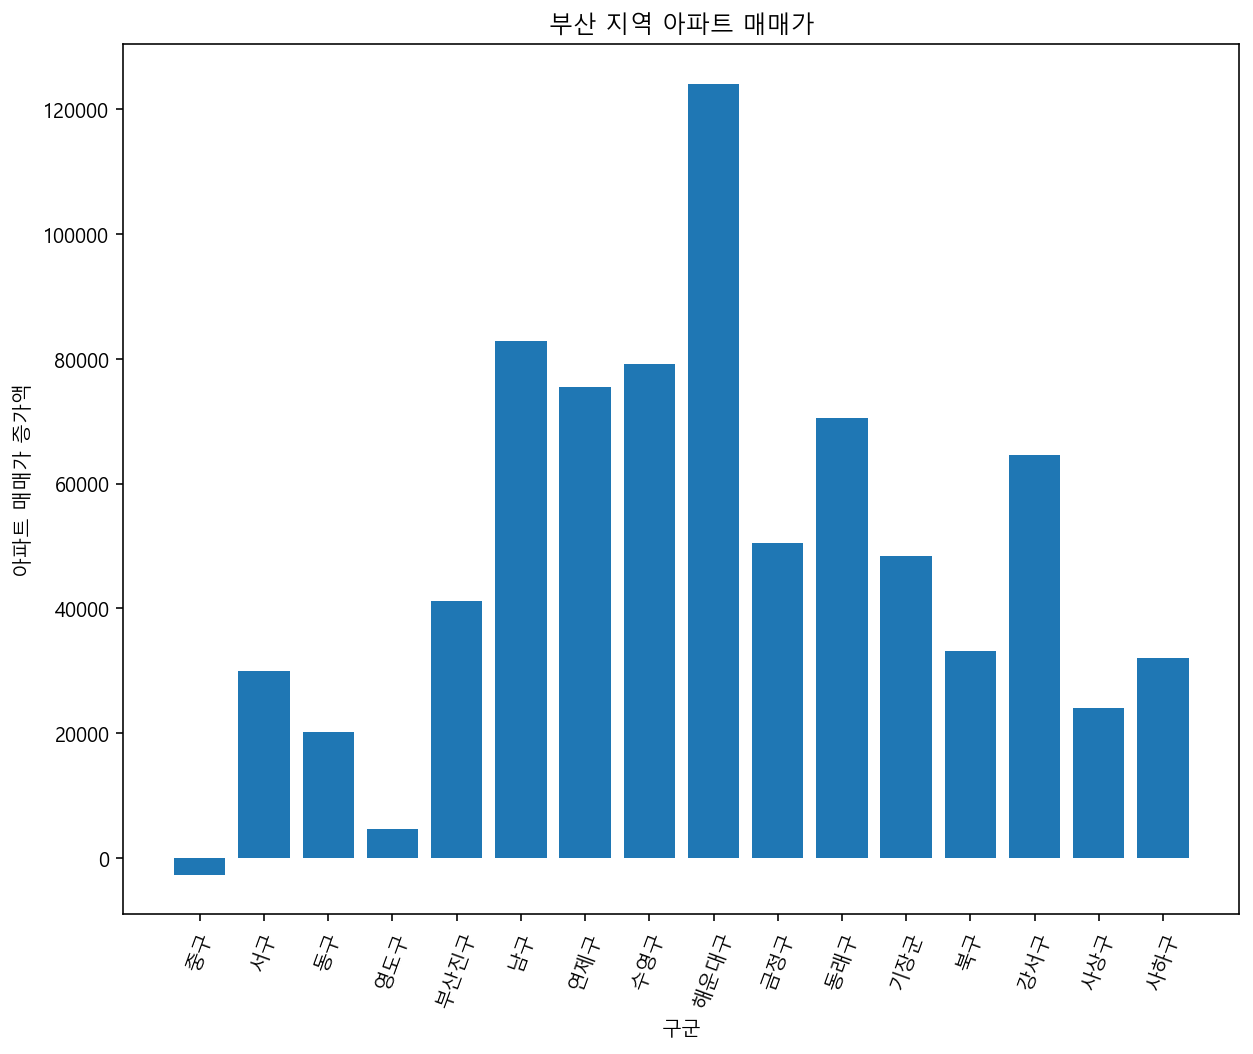

In [69]:
# 부산 지역 가격 변동

plt.figure(figsize=(10, 8))
plt.bar(busan['구군'], busan['증가액'])
plt.xticks(rotation=70)
plt.title('부산 지역 아파트 매매가')
plt.xlabel('구군')
plt.ylabel('아파트 매매가 증가액')
plt.show()


**3) 부산 지역 가격 변동 순위**

- 아파트 매매가 증가액을 기준으로 내림차순 정렬해 tmp_b 데이터프레임을 선언합니다.
- tmp_b 데이터프레임을 대상으로 다시 시각화해 확인합니다.

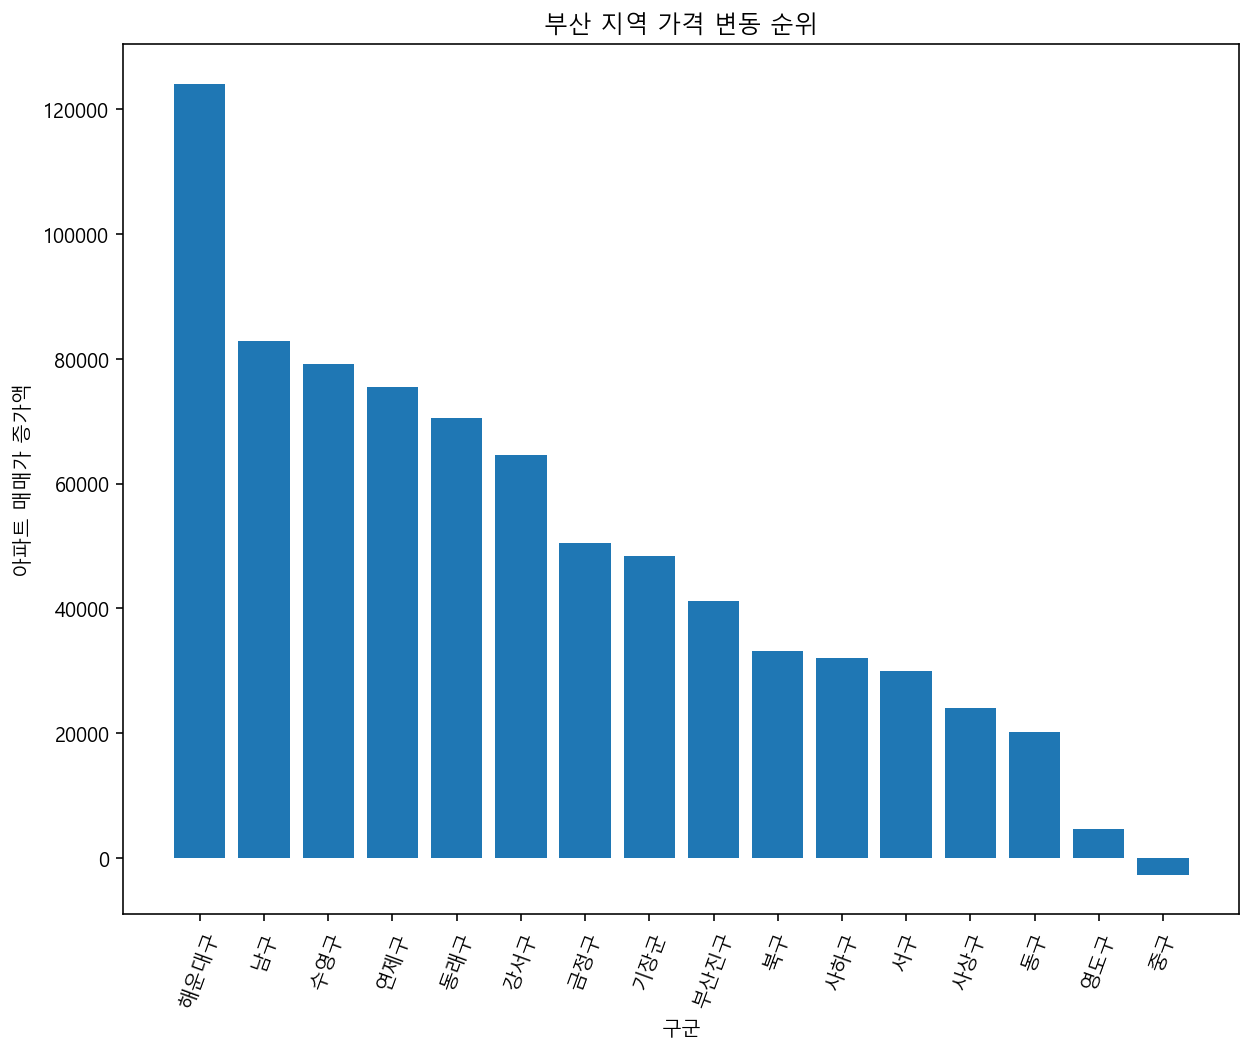

In [72]:
# 부산 지역 가격 변동 순위
tmp_b = busan.sort_values(by='증가액', ascending=False)

# 시각화
plt.figure(figsize=(10, 8))
plt.bar(tmp_b['구군'], tmp_b['증가액'])
plt.xticks(rotation=70)
plt.title('부산 지역 가격 변동 순위')
plt.xlabel('구군')
plt.ylabel('아파트 매매가 증가액')
plt.show()

### 4.3. 울산 지역 분석

**1) 울산 지역 데이터 추출**

In [85]:
Ulsan = apart2.loc[apart2['시도']=='울산',:]
Ulsan

,시도,구군,2021-07,증가액,증가율
112,울산,중구,337967,60506,21.807029
113,울산,남구,351745,67349,23.681416
114,울산,동구,224091,17955,8.710269
115,울산,북구,241496,33768,16.255873
116,울산,울주군,229476,29149,14.550710


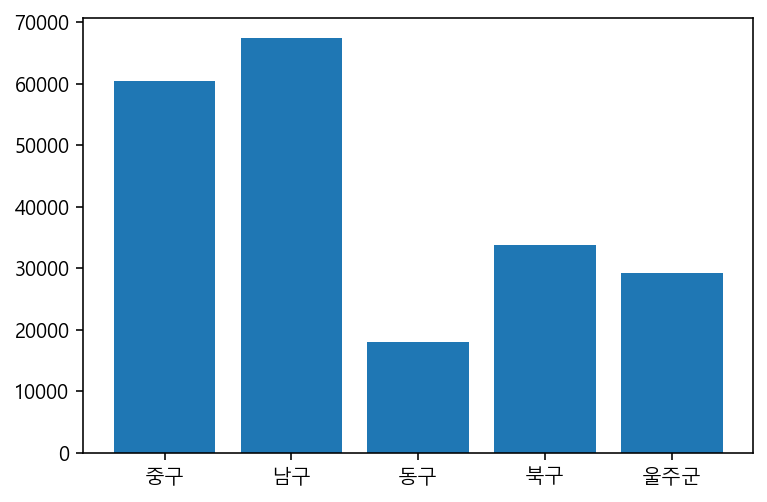

In [86]:
plt.bar(Ulsan['구군'], Ulsan['증가액'])
plt.show()

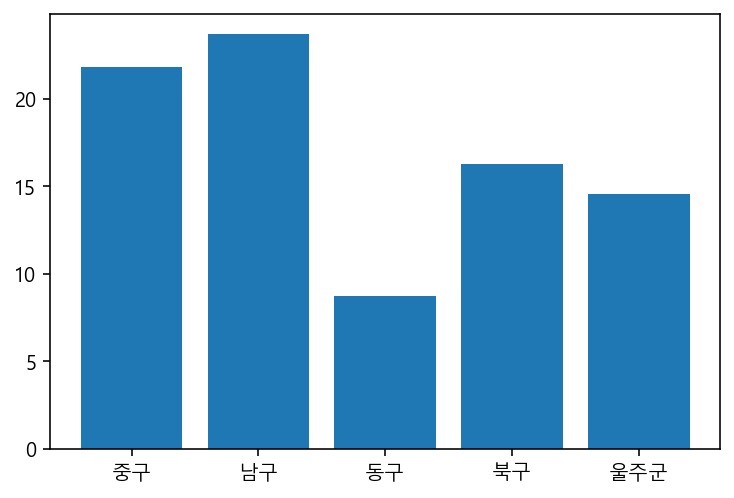

In [133]:
plt.bar(Ulsan['구군'], Ulsan['증가율'])
plt.show()

**2) 울산 지역 데이터 추출**

In [102]:
# 데이터프레임 만들기
ulsan = apart.loc[apart2['시도']=='울산',:]
ulsan.set_index('구군', inplace=True) 
ulsan.drop(columns=['시도', '증가액', '증가율'],axis=0,inplace=True)

# 확인
ulsan

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
구군,,,,,,,,,,,,
중구,277461,281645,286678,290974,296914,308342,316803,323618,327125,330421,333507,337967
남구,284396,289047,297038,305000,314604,334047,341142,343925,345547,346943,347858,351745
동구,206136,204909,203582,204141,205445,213373,219855,221542,221786,222142,222405,224091
북구,207728,209625,212103,213848,216371,224335,231022,235223,236884,238067,239902,241496
울주군,200327,201952,204060,205345,207583,215399,221268,223708,226518,227369,227595,229476


**3) 행과 열 변환**
- 행렬을 변환하여 시간순으로 데이터프레임을 바꾼다.

In [103]:
u1 = np.transpose(ulsan)
u1

구군,중구,남구,동구,북구,울주군
2020-08,277461,284396,206136,207728,200327
2020-09,281645,289047,204909,209625,201952
2020-10,286678,297038,203582,212103,204060
2020-11,290974,305000,204141,213848,205345
2020-12,296914,314604,205445,216371,207583
2021-01,308342,334047,213373,224335,215399
2021-02,316803,341142,219855,231022,221268
2021-03,323618,343925,221542,235223,223708
2021-04,327125,345547,221786,236884,226518
2021-05,330421,346943,222142,238067,227369


**4) 울산 지역 중 '남구' 아파트 가격 추이**

In [121]:
u_nam = u1.loc[:,'남구']

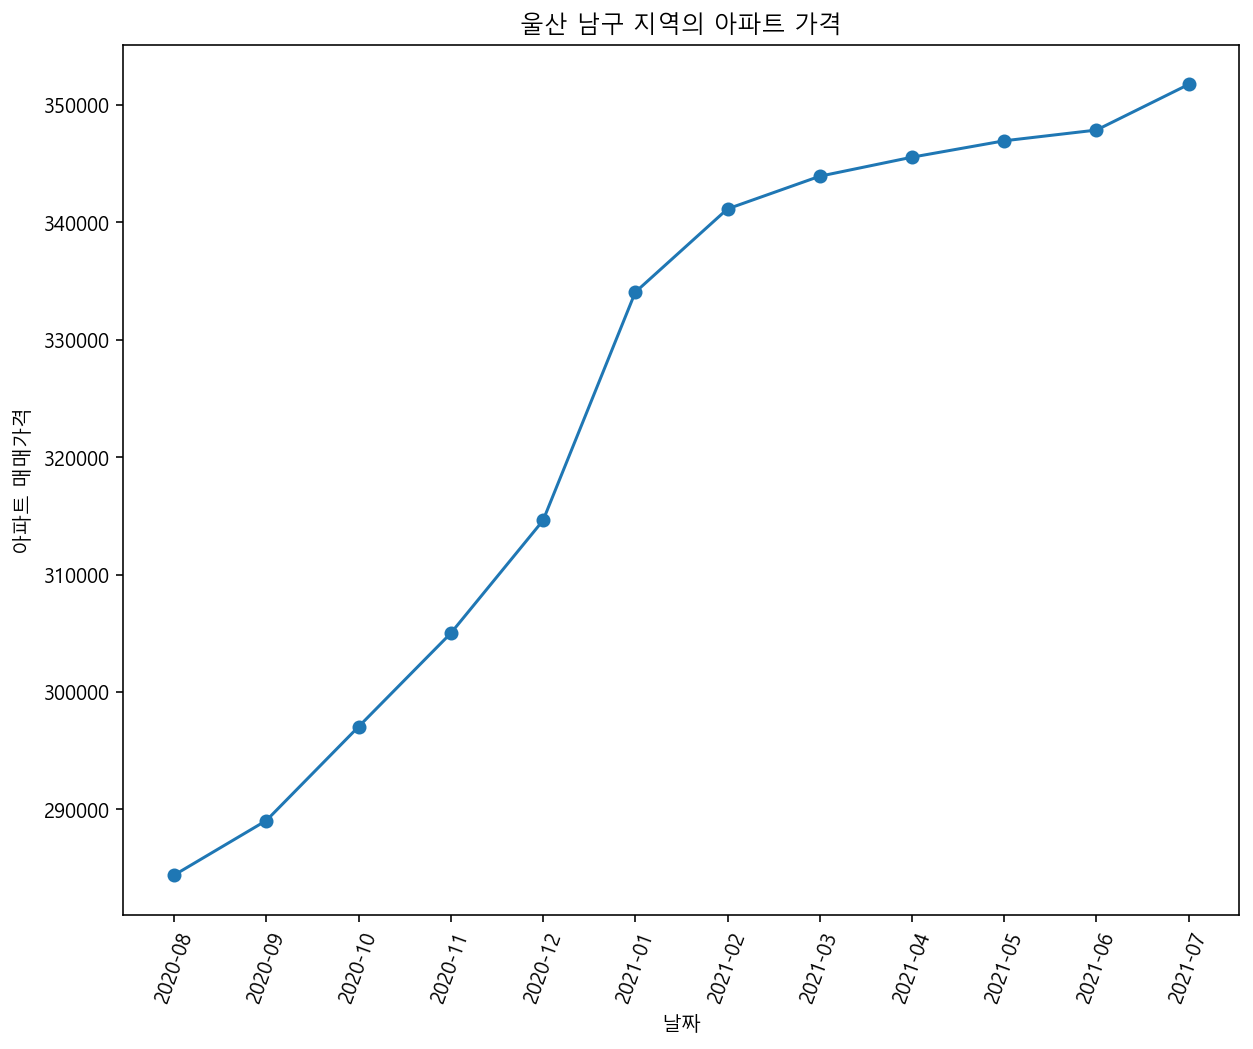

In [126]:
plt.figure(figsize=(10, 8))
plt.plot(u_nam, marker='o')
plt.xticks(rotation=70)
plt.title('울산 남구 지역의 아파트 가격')
plt.ylabel('아파트 매매가격')
plt.xlabel('날짜')
plt.show()

**5) 울산 지역 아파트 가격 추이**

In [122]:
u_jun = u1.loc[:,'중구']
u_don = u1.loc[:,'동구']
u_buk = u1.loc[:,'북구']
u_ulj = u1.loc[:,'울주군']

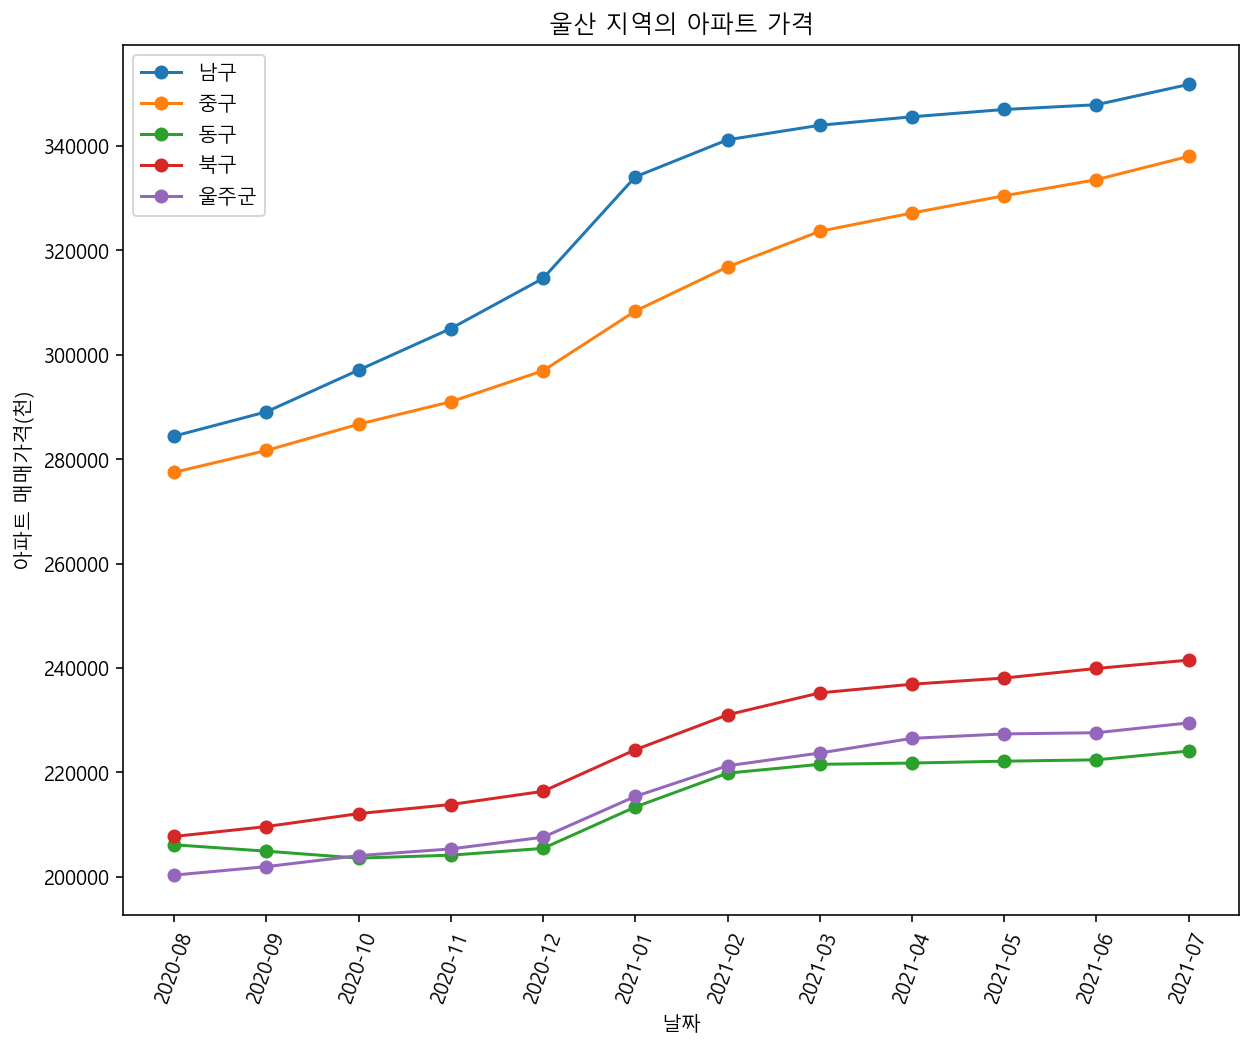

In [129]:
plt.figure(figsize=(10, 8))
plt.plot(u_nam, marker='o')
plt.plot(u_jun, marker='o')
plt.plot(u_don, marker='o')
plt.plot(u_buk, marker='o')
plt.plot(u_ulj, marker='o')
plt.xticks(rotation=70)
plt.title('울산 지역의 아파트 가격')
plt.ylabel('아파트 매매가격(천)')
plt.xlabel('날짜')
plt.legend(['남구', '중구','동구','북구','울주군'])
plt.show()

## 5.정리

- 분석을 통해 확인한 내용을 정리합니다.

**1) 의견**

- 아파트 매매 증가액이 농촌지역을 중심으로 낮은 것으로 보아, 경제활동 인구가 적고 노령 인구가 많은 것으로 추정된다. 
- 특히, 부산 같은 대도시 지역이여도 고령화가 진행되고 있기 때문에 매매 증가액이 낮은 것을 볼 수 있다.
- 9개 구군을 제외하고 아파트 매매가격이 모두 상승한 것은 물가 상승과 정책 변화의 이유가 있어보인다.
- 아파트 매매가격이 대부분 상승하여 아파트 매매가격의 안정화가 필요해 보인다.

**2) 기타**

- 살고 있는 지역의 아파트 매매가격을 낱낱이 살펴봐서 유익한 시간이었습니다ㅎㅎ 더 많은 자료를 활용하여 다방면으로 분석해보고 싶습니다!